# Circuito RLC

O circuito RLC é um circuito elétrico composto por tres componentes principais, um Resistor, um Indutor e um Capacitor, acompanhados de uma fonte de tensão. Cada componente tem um papel no circuito relacionado a sua função, enquanto o resistor tem papel de dificultar o fluxo das cargas elétricas, o indutor e o capacitor são capazes de transformar a energia cinética das carga em moviemtno em energia potencial, armazenando-a no campo elétrico gerado ao redor do capacitor ou no campo magnético gerado ao redor do indutor.

O Comportamento dos componentes pode ser descrito na forma de :

* Resistor: $V_R = \frac{I}{R} = R \frac{dQ}{dt}$
* Indutor: $V_L = -L \frac{dI}{dt} = -L \frac{d^2Q}{dt^2}$
* Capacitor: $V_C = \frac{Q}{C}$

Onde, 
* $V_R$ é a tensão no resistor
* $V_L$ é a tensão no indutor
* $V_C$ é a tensão no capacitor
* $I$ é a corrente elétrica onde $I = \frac{dQ}{dt}$
* $R$ é a resistência
* $L$ é a impedância
* $C$ é a capacitância
* $Q$ é a carga elétrica

Ao colocar os componentes em série tem-se que a tensão total é a soma das tensões em cada componente, ou seja:

$$V = V_R + V_L + V_C$$
Substituindo as tensões de cada componente na equação e assumindo a tensão da fonte como $V=\epsilon(t)$, obtem

$$ L \frac{d^2Q}{dt^2} - R \frac{dQ}{dt} + \frac{Q}{C} + \epsilon(t) = 0$$

Ao qual é observado um analogo a um oscilador harmonico forçado, onde pode ser adotado para fonte de voltagem uma função senoidal:

$$\epsilon(t) = V_0 \cos{w_0t}$$

onde $V_0$ e $w_0$ são amplitude e frequência angular da fonte tensão, para quais se obtem a solução de $Q(t)$, 

$$Q(t) = A_1e^{s_1t} + A_2e^{s_2t}$$

onde $A_1$, $A_2$, $s_1$ e $s_2$ são constantes, e com isso temos que para a fonte senoidal a corrente no circuito segue a equação:

$$I(t)=I_0 \cos{wt}$$

A partir da generalização da Lei de Ohm, obtemos:

$$ |V| = Z|I| $$

onde Z é a impedância, que é a caracteristica geral de um componente elétrico na oposição a passagem de corrente alternada, dada por

$$ Z = R + jX$$

onde Z é um numero complexo composto pela parte real R e parte imaginaria X, que é a reatancia.

Para cada componente temos,

$$ V_R = RI \rightarrow X_R = R$$

$$ V_L = L I_0 w \sin{wt} \rightarrow  X_L = wL \text{ e } Z_L = iwL$$

$$V_C = -\frac{I_0}{wC}sin(wt) \rightarrow X_C = -\frac{1}{wC} \text{ e } Z_C = -\frac{i}{wC}$$

Temos então,

$$|V| = \sqrt{V_R^2 + (V_L - V_C)^2}$$
$$ V = \sqrt{(IR)^2 + (IX_L- IX_C)^2}$$
$$ V =IZ = I \sqrt{R^2 + (X_L- X_C)^2}$$

Portanto a impedancia do sistema é dado por:

$$ Z = \sqrt{R^2 + (X_L- X_C)^2}$$



## Primeiro passo: carregando módulos do Python 3

Neste ponto você já sabe do _minimum minimorum_ de python para saber que ele tem seu desempenho melhorado significativamente com o uso dos módulos (_modules_) que nada mais são do que bibliotecas desenvolvidas pela comunidade de usuários e desenvolvedores do python. Eles tem em geral propósitos específicos para facilitar a resolução de classes de problemas bem definidos.
Alguns dos módulos que usaremos são o [pandas](https://pandas.pydata.org/), [numpy](https://numpy.org/), [matplotlib](https://matplotlib.org/), [scipy](https://www.scipy.org/), [sklearn](https://scikit-learn.org/stable/) e [sympy](https://www.sympy.org/en/index.html). 

A importação de módulos não é como acontece com a importação de _header files_ em programas em C/C++, que precisam ser declaradas logo no início do programa. No caso do python pode-se importar o módulo apenas no ponto do programa a partir do qual precisaremos dele. Então aqui iremos importar alguns que serão frequentemente usados.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import statsmodels.api as sm
%matplotlib inline 

# Indutor


## Segundo passo: introduzindo os dados experimentais




**ATENÇÃO**: <font color='blue'>neste método é necessário ter um arquivo do tipo CSV para cada conjunto de dados!!</font>

In [2]:
def calc_uncertainty(value, decimal_places=4, percent_error=0.002, D_factor=5.0):
    
    percent_error_i = abs(value * percent_error)
    digit_error = abs(D_factor * (10**(-decimal_places))) # 5 digits of last decimal place
    return percent_error_i + digit_error

rho =[]
s_rho = []

In [3]:
#vc precisa de um arquivo .csv para cada conjunto de dados
dados = pd.read_csv("metodo1.csv")
print(dados)

# Frequencia,VL,VC,sFrequencia,sVL,sVC=
x = dados['Frequencia']
y = dados['VL'] # Tensão no indutor
incx = calc_uncertainty(dados['sFrequencia'], decimal_places=2, percent_error=0.02, D_factor=5.0)
incy = calc_uncertainty(dados['sVL'], decimal_places=2, percent_error=0.01, D_factor=3.0)


# Format and print x with uncertainties
for xi, incxi in zip(x, incx):
    print(f"{xi} +- {incxi}")


print("")
# Format and print y with uncertainties
for yi, incyi in zip(y, incy):
    print(f"{yi} +- {incyi}")




    Frequencia    VL     VC  sFrequencia   sVL   sVC
0          103   1.1  273.5         0.05  0.05  0.05
1          199   1.9  120.9         0.05  0.05  0.05
2          307   2.8   81.1         0.05  0.05  0.05
3          403   4.1   65.1         0.05  0.05  0.05
4          497   5.3   51.0         0.05  0.05  0.05
5          605   6.3   44.8         0.05  0.05  0.05
6          699   6.9   36.1         0.05  0.05  0.05
7          798   7.2   28.6         0.05  0.05  0.05
8          902   9.7   30.3         0.05  0.05  0.05
9         1103   9.8   25.0         0.05  0.05  0.05
10        1102  11.3   23.7         0.05  0.05  0.05
11        1196  11.6   20.4         0.05  0.05  0.05
12        1306  11.6   17.4         0.05  0.05  0.05
13        1402  14.0   18.0         0.05  0.05  0.05
14        1496  14.9   16.8         0.05  0.05  0.05
15        1603  15.5   15.3         0.05  0.05  0.05
16        1701  17.6   15.4         0.05  0.05  0.05
17        1800  19.4   15.2         0.05  0.05

Podemos inicialmente colocar os dados num gráfico para fazer uma primeira visualização exploratória. Para isso usamos o _pyplot_ do _matplotlib_ para graficar os pontos com suas respectivas barras de erro.

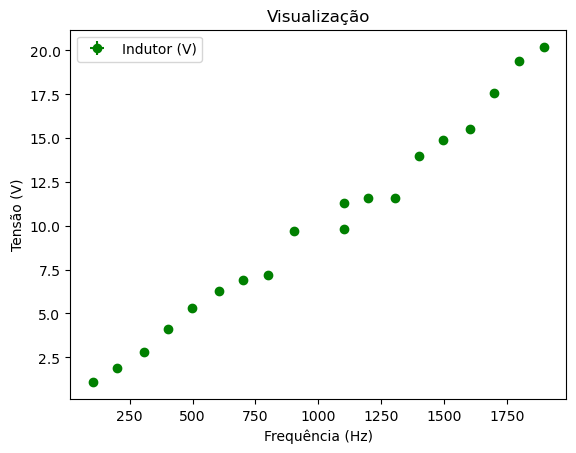

pandas.core.frame.DataFrame

In [4]:
# visualizando os dados pelo gráfico (Resistor)
plt.figure()
plt.errorbar(x, y, incy, incx, 'og', label='Indutor (V)')
plt.title("Visualização")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Tensão (V)")
plt.legend()
plt.show()

type(x.to_frame())

Podemos observar que a relação não é linear. Para se fazer um ajuste pelo método dos mínimos quadrados (MMQ) devemos conhecer - ou ao menos modelar - a dependência de y em relação a x (por exemplo, campo elétrico em função da distância). De posse dessa forma funcional é possível aplicar uma linearização aos dados e então sobre o resultado da linearização é possível se fazer um ajuste linear usando MMQ.

## Linearização dos dados

A função que descreve a relação entre tensão e frequência no circuito RLC é dada por é não linearizada.

In [5]:
#linearizando a sequência de valores de x usando numpy
# Linearização para ajuste linear: 1/V^2 vs f^2


z = x

z 

0      103
1      199
2      307
3      403
4      497
5      605
6      699
7      798
8      902
9     1103
10    1102
11    1196
12    1306
13    1402
14    1496
15    1603
16    1701
17    1800
18    1897
Name: Frequencia, dtype: int64

### Propagação das incertezas na linearização

Como nosso caso é linear, não precisamos nos preocupar com a propagação de incertezas.

In [6]:
#propagando a incerteza por conta da linearização
sigma_z = incx
sigma_z

0     0.051
1     0.051
2     0.051
3     0.051
4     0.051
5     0.051
6     0.051
7     0.051
8     0.051
9     0.051
10    0.051
11    0.051
12    0.051
13    0.051
14    0.051
15    0.051
16    0.051
17    0.051
18    0.051
Name: sFrequencia, dtype: float64

## Visualizando a linearização

Em seguida podemos fazer a visualização dos dados após a linearização refazendo o gráfico com a variável z no lugar de x:

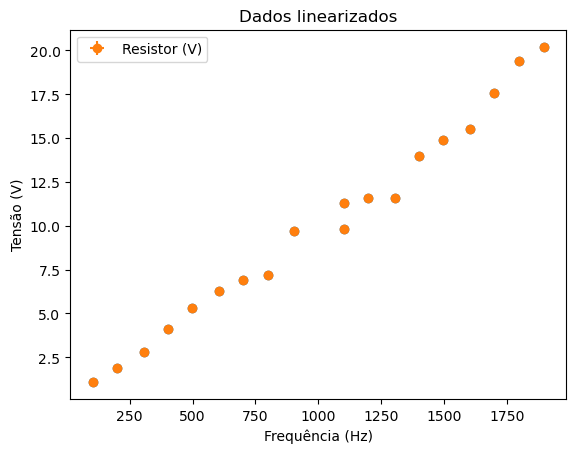

In [7]:
# visualizando os dados linearizados
plt.errorbar(z, y, incy, sigma_z, 'o')
plt.title("Dados linearizados")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Tensão (V)")
plt.errorbar(z, y, incy, sigma_z, 'o', label='Resistor (V)')
plt.legend()
plt.show()

## MMQ com $ \chi^2 $

Em um ajuste por regressão linear no modo mais simples não se utilizam incertezas associadas aos pontos e também não se obtém as incertezas nos parâmetros ajustados (ou matriz covariância). Além disso utiliza-se como medida da qualidade de ajuste a variável $ R^2 $, que na verdade é uma estimativa de quanto dos dados pode ser descrito pelo modelo/função ajustado(a). Ela é também o quadrado da correlação de Pearson. Em geral se diz que quanto mais próximo de 1 é  $ R^2 $ melhor é o ajuste, mas se for realizado o cálculo de $ R^2 $ para um ajuste a uma grandeza constante o valor será muito próximo de zero, mesmo que se tenha um ajuste bastante verossímil.
Para se obter um ajuste de MMQ que tenha significado probabilístico - ou seja tenha um resultado de $ \chi^2 $ associado - é preciso que se informe ao método de ajuste as incertezas dos pontos experimentais. No caso do ajuste por MMQ somente as incertezas na variável dependente (y) é que são aceitas, portanto se as incertezas em x não são desprezíveis é preciso propagá-las para y. Para uma explicação detalhada do procedimento, verifique a **referência 1**. 

Para essa propagação completa é preciso fazer:
$$ (\sigma_y)^2= (\sigma_{y_0})^2 + \left(\frac{dy}{dx}\sigma_x \right)^2$$
onde $\sigma_{y_0}$ corresponde à incerteza original de y (aquela que vem da própria medida) e $\frac{dy}{dx}$ pode ser aproximado pelo coeficiente angular de um ajuste linear aos dados. Neste exemplo, $\sigma_x$ é a variável sigma_z.
Para o coeficiente angular podemos realizar uma regressão linear simples (RLS) aos dados e usar com excelente precisão o valor do parâmetro correspondente obtido da RLS, sem se preocupar neste momento com a qualidade do ajuste.


In [8]:
#ajustando a reta (RLS)
xlin = sm.add_constant(z)
reglin = sm.OLS(y,xlin)
reglin_dat = reglin.fit()
f_de_z = reglin_dat.params

Para esse ajuste o coeficiente angular é o primeiro parâmetro do vetor f_de_z com o valor:

In [9]:
print("coeficiente angular: ", f_de_z.iloc[1])

coeficiente angular:  0.010293701584930424


Com o coeficiente angular ($dy/dx$) pode-se então fazer a transferência de incertezas para o y:

In [10]:
#transferindo incerteza de z para y
incytransf = np.sqrt(np.power(f_de_z.iloc[1]*sigma_z,2)+np.power(incy,2)) 
incytransf

0     0.030505
1     0.030505
2     0.030505
3     0.030505
4     0.030505
5     0.030505
6     0.030505
7     0.030505
8     0.030505
9     0.030505
10    0.030505
11    0.030505
12    0.030505
13    0.030505
14    0.030505
15    0.030505
16    0.030505
17    0.030505
18    0.030505
dtype: float64

É interessante visualizar novamente os pontos agora apenas com incertezas em y

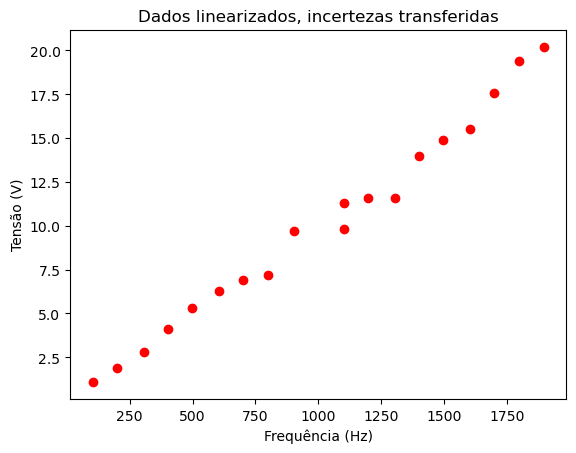

In [11]:
#plotando gráfico com as incertezas transferidas para a variável dependente (y)
plt.errorbar(z, y, incytransf,0,'or')
plt.title("Dados linearizados, incertezas transferidas")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Tensão (V)")
plt.show()


Para se obter as incertezas do ajuste é necessário obter o inverso da **matriz de covariância** do ajuste e a partir dela, os termos da sua diagonal principal. Esses termos correspondem às variâncias dos parâmetros de forma que (veja o capítulo 12 da **referência 2**):
$$\sigma_{p_j}^2=a_{jj}$$
onde os termos $a_{jj}$ correspondem a
$$ \mathcal{M}^{-1} = \begin{pmatrix} a_{00} & a_{01} \\ a_{10} & a_{11} \end{pmatrix}$$
No _WLS_ do **statsmodels** a função HC0 ('_HCzero_') retorna diretamente as incertezas do ajuste.

In [12]:
#criando os 'pesos' a partir da incerteza
ws = 1/(incytransf**2)
reglinw = sm.WLS(y,xlin,ws)
result_rlw = reglinw.fit()
fitpars = result_rlw.params
fiterrs = result_rlw.HC0_se
print(fitpars.iloc[0],fitpars.iloc[1])
print(fiterrs.iloc[0],fiterrs.iloc[1])

-0.2950147685413096 0.010293701584930431
0.21455880678288453 0.0002686233257654783


**ATENÇÃO:** note que os parâmetros do ajuste **mudaram** quando as incertezas foram utilizadas como _pesos_ no ajuste.

In [13]:
#note que o statsmodels retorna os parâmetros em ordem inversa em relação aos outros dois métodos
p_0 = fitpars.iloc[1] #coef ang
p_1 = fitpars.iloc[0] #coef lin
#note que não há raiz quadrada
s_p_0 = fiterrs.iloc[1] #incert p_0
s_p_1 = fiterrs.iloc[0] #incert p_1
rp_0 = np.round(p_0,2)
rp_1 = np.round(p_1,2)
rs_p_0 = np.round(s_p_0,2)
rs_p_1 = np.round(s_p_1,2)
print("coef. angular=",rp_0,"+-",rs_p_0)
print("coef. linear=",rp_1,"+-",rs_p_1)

coef. angular= 0.01 +- 0.0
coef. linear= -0.3 +- 0.21


## Graficando o ajuste aos pontos
Agora colocamos a linha reta referente aos pontos da seguinte forma:

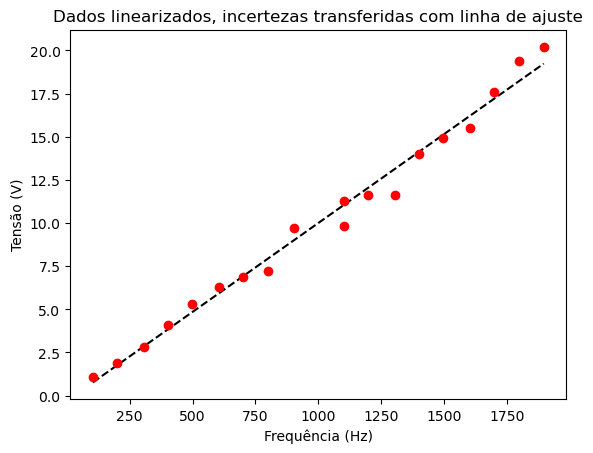

In [14]:
xline = z
yline = fitpars.iloc[0] + fitpars.iloc[1] * z
plt.errorbar(z, y, incytransf,0,'or')
plt.title("Dados linearizados, incertezas transferidas com linha de ajuste")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Tensão (V)")
#incluindo a linha do ajuste linear, k=preto, '--' = linha tracejada
plt.plot(xline, yline, 'k--')

## Qualidade do ajuste
Existem várias grandezas utilizadas como medida de qualidade do ajuste: $\chi^2_{red}$ (qui-quadrado reduzido), $R^2$ e gráfico de resíduos.



 ### 1. Teste de $\chi^2$ ou $\chi^2_{red}$
 O teste de $\chi^2$ baseia-se na expectativa de que o $\chi^2_{red}$ seja muito próximo do valor 1 (um). Para uma explicação deste teste veja o capítulo 14 da **referência 2**.
 Alguns cuidados devem ser tomados na interpretação de $\chi^2_{red}$. Em geral se os valores se afastam muito de 1 (ou $\chi^2_{red}$>>1 ou $\chi^2_{red}\approx 0$ há problemas. O primeiro dos problemas é com o a estimação da incerteza dos dados experimentais. Quando a subestimação das incertezas o valor de $\chi^2_{red}$ fica artificialmente maior que 1 e o contrário também é verdade, incertezas superestimadas levam a um reduzido valor de $\chi^2_{red}$. O último caso é sempre o sintoma de superestimação de incertezas. No entanto, quando $\chi^2_{red}$>>1 nem sempre o problema é de subestimação de incertezas, mas pode ser que a função ajustada (ou modelo) não é adequado para descrever os dados experimentais (por exemplo, usar uma reta em dados que seriam melhor descritos por um polinômio do segundo grau). Não existe uma única forma para se calcular o $\chi^2_{red}$ com o **statsmodel**, mas podemos usar o **numpy** com os resultados do _WLS_ :

In [15]:
#calulando chi^2_red
invpars = fitpars.iloc[1],fitpars.iloc[0]
yhat = np.polyval(invpars, z)
chi_squared = np.sum(((yhat - y)/incytransf) ** 2)
print(chi_squared)
chi2_red = chi_squared/(len(z)-2)
chi2_red

9466.111132418915


np.float64(556.8300666128773)

### 2. Valor de $R^2$
 O $R^2$ é simplesmente o quadrado do coeficiente de correlação. O coeficiente de correlação, geralmente denotado por $\rho$ (também conhecido como [coeficiente de correlação de Pearson](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson)). Como o valor de $\rho$ é limitado
 $$-1<\rho<1$$
 o valor de $R^2$ quadrado também será limitado ($0<R^2<1$), interpretando-se a qualidade do ajuste como sendo tão melhor quanto mais próxima de 1. No entanto, esse é um equívoco, pois assim como $\rho$, $R^2$ dá uma medida da intensidade da correlação entre os valores $x$ e $y$ dos pontos experimentais. Se o ajuste de reta proposto tiver um coeficiente angular com valor muito baixo comparado ao do coeficiente linear combinado com flutuações dos pontos moderadas (pouco mais de 1%) o valor de $R^2$ pode facilmente cair abaixo de 0.5, o que levaria à uma conclusão possivelmente errônea de má qualidade de ajuste (ou de modelo). Por outro lado, um conjunto de pontos levemente não linear (tipo $x^{3/2}$) pode ser ajustado por uma reta com $R^2$>0.9, indicando erroneamente que o ajuste é bom.
**Portanto deve-se evitar $R^2$ como única medida de qualidade de ajuste.**

O **statsmodels** tem uma forma bem simples de se obter o $R^2$ a partir dos resultados do ajuste via _WLS_ :


In [16]:
np.round(result_rlw.rsquared,3)

np.float64(0.986)

### 3. Gráfico de resíduos

O gráfico de resíduos é sempre uma boa ferramenta e deve sempre que possível ser usada complementarmente a outras medidas de qualidade, principalmente quando se usa $R^2$, que jamais deve ser usado sozinho. 
Para se fazer um gráfico de ajuste faz-se um gráfico com o mesmo eixo $x$ dos dados originais, enquanto que no eixo vertical devem ser colocados os valores da diferença $(\hat{y}-y)$, onde $\hat{y}$ são os valores calculados para cada $x$ a partir dos parâmetros do ajuste.

Um bom ajuste deverá mostrar um gráfico de resíduos com os pontos distribuídos de maneira aleatória acima e abaixo do eixo $x$. Na célula abaixo é apresentada a confecção de um gráfico de resíduos. Os dados usados neste exemplo _parecem_ razoáveis.

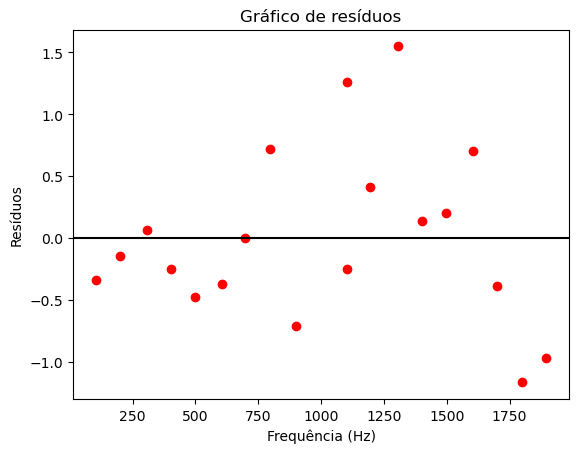

In [17]:
resid = (yhat - y)
plt.plot(z, resid, 'or')
plt.title("Gráfico de resíduos")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Resíduos")
plt.axhline(y=0, color='k', linestyle='-')

In [18]:
aL = p_0
s_aL = s_p_0

# Capacitor

In [19]:
#vc precisa de um arquivo .csv para cada conjunto de dados

print(dados)
x = dados['Frequencia'].astype(float) # Frequência
y = dados['VC'].astype(float) # Tensão no capacitor
incx = calc_uncertainty(dados['sFrequencia'], decimal_places=2, percent_error=0.02, D_factor=5.0)
incy = calc_uncertainty(dados['sVC'], decimal_places=2, percent_error=0.01, D_factor=3.0)

# Format and print x with uncertainties
for xi, incxi in zip(x, incx):
    print(f"{xi} +- {incxi}")


print("")
# Format and print y with uncertainties
for yi, incyi in zip(y, incy):
    print(f"{yi} +- {incyi}")



    Frequencia    VL     VC  sFrequencia   sVL   sVC
0          103   1.1  273.5         0.05  0.05  0.05
1          199   1.9  120.9         0.05  0.05  0.05
2          307   2.8   81.1         0.05  0.05  0.05
3          403   4.1   65.1         0.05  0.05  0.05
4          497   5.3   51.0         0.05  0.05  0.05
5          605   6.3   44.8         0.05  0.05  0.05
6          699   6.9   36.1         0.05  0.05  0.05
7          798   7.2   28.6         0.05  0.05  0.05
8          902   9.7   30.3         0.05  0.05  0.05
9         1103   9.8   25.0         0.05  0.05  0.05
10        1102  11.3   23.7         0.05  0.05  0.05
11        1196  11.6   20.4         0.05  0.05  0.05
12        1306  11.6   17.4         0.05  0.05  0.05
13        1402  14.0   18.0         0.05  0.05  0.05
14        1496  14.9   16.8         0.05  0.05  0.05
15        1603  15.5   15.3         0.05  0.05  0.05
16        1701  17.6   15.4         0.05  0.05  0.05
17        1800  19.4   15.2         0.05  0.05

Podemos inicialmente colocar os dados num gráfico para fazer uma primeira visualização exploratória. Para isso usamos o _pyplot_ do _matplotlib_ para graficar os pontos com suas respectivas barras de erro.

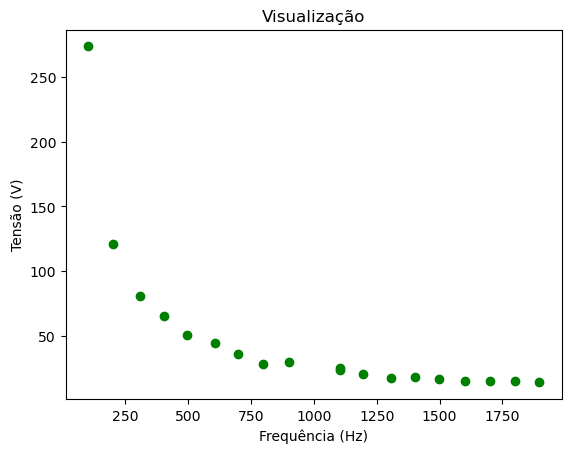

pandas.core.frame.DataFrame

In [20]:
# visualizando os dados pelo gráfico

plt.figure() 
plt.errorbar(x, y, incy, incx,'og')
plt.title("Visualização")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Tensão (V)")
plt.show()

type(x.to_frame())

Podemos observar que a relação não é linear. Para se fazer um ajuste pelo método dos mínimos quadrados (MMQ) devemos conhecer - ou ao menos modelar - a dependência de y em relação a x (por exemplo, campo elétrico em função da distância). De posse dessa forma funcional é possível aplicar uma linearização aos dados e então sobre o resultado da linearização é possível se fazer um ajuste linear usando MMQ.

## Linearização dos dados

temos que a relaçao de tensão e frequÊncia do capacitor é dada por:
$$ V(s) = \frac{1}{sC}$$

entao linearizando temos que:

$$ z = \frac{1}{s}$$

In [21]:
#linearizando a sequência de valores de x usando numpy
z = np.power(x,-1)
z

0     0.009709
1     0.005025
2     0.003257
3     0.002481
4     0.002012
5     0.001653
6     0.001431
7     0.001253
8     0.001109
9     0.000907
10    0.000907
11    0.000836
12    0.000766
13    0.000713
14    0.000668
15    0.000624
16    0.000588
17    0.000556
18    0.000527
Name: Frequencia, dtype: float64

In [22]:
#propagando a incerteza por conta da linearização
sigma_z = 1/(x**2) * incx
sigma_z

0     4.807239e-06
1     1.287846e-06
2     5.411198e-07
3     3.140220e-07
4     2.064702e-07
5     1.393347e-07
6     1.043796e-07
7     8.008744e-08
8     6.268406e-08
9     4.191980e-08
10    4.199591e-08
11    3.565396e-08
12    2.990087e-08
13    2.594622e-08
14    2.278804e-08
15    1.984738e-08
16    1.762632e-08
17    1.574074e-08
18    1.417214e-08
dtype: float64

## Visualizando a linearização

Em seguida podemos fazer a visualização dos dados após a linearização refazendo o gráfico com a variável z no lugar de x:

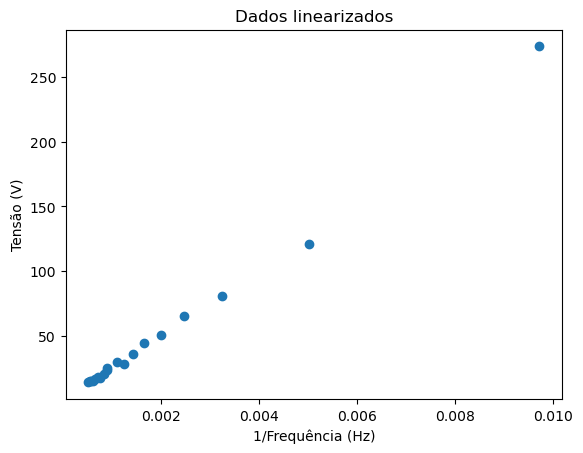

In [23]:
# visualizando os dados linearizados
plt.errorbar(z, y, incy,sigma_z,'o')
plt.title("Dados linearizados")
plt.xlabel("1/Frequência (Hz)")
plt.ylabel("Tensão (V)")
plt.show()

## MMQ com $ \chi^2 $

Em um ajuste por regressão linear no modo mais simples não se utilizam incertezas associadas aos pontos e também não se obtém as incertezas nos parâmetros ajustados (ou matriz covariância). Além disso utiliza-se como medida da qualidade de ajuste a variável $ R^2 $, que na verdade é uma estimativa de quanto dos dados pode ser descrito pelo modelo/função ajustado(a). Ela é também o quadrado da correlação de Pearson. Em geral se diz que quanto mais próximo de 1 é  $ R^2 $ melhor é o ajuste, mas se for realizado o cálculo de $ R^2 $ para um ajuste a uma grandeza constante o valor será muito próximo de zero, mesmo que se tenha um ajuste bastante verossímil.
Para se obter um ajuste de MMQ que tenha significado probabilístico - ou seja tenha um resultado de $ \chi^2 $ associado - é preciso que se informe ao método de ajuste as incertezas dos pontos experimentais. No caso do ajuste por MMQ somente as incertezas na variável dependente (y) é que são aceitas, portanto se as incertezas em x não são desprezíveis é preciso propagá-las para y. Para uma explicação detalhada do procedimento, verifique a **referência 1**. 

Para essa propagação completa é preciso fazer:
$$ (\sigma_y)^2= (\sigma_{y_0})^2 + \left(\frac{dy}{dx}\sigma_x \right)^2$$
onde $\sigma_{y_0}$ corresponde à incerteza original de y (aquela que vem da própria medida) e $\frac{dy}{dx}$ pode ser aproximado pelo coeficiente angular de um ajuste linear aos dados. Neste exemplo, $\sigma_x$ é a variável sigma_z.
Para o coeficiente angular podemos realizar uma regressão linear simples (RLS) aos dados e usar com excelente precisão o valor do parâmetro correspondente obtido da RLS, sem se preocupar neste momento com a qualidade do ajuste.


In [24]:
#ajustando a reta (RLS)
xlin = sm.add_constant(z)
reglin = sm.OLS(y,xlin)
reglin_dat = reglin.fit()
f_de_z = reglin_dat.params

Para esse ajuste o coeficiente angular é o primeiro parâmetro do vetor f_de_z com o valor:

In [25]:
print("coeficiente angular: ", f_de_z.iloc[1])

coeficiente angular:  27517.901901895963


Com o coeficiente angular ($dy/dx$) pode-se então fazer a transferência de incertezas para o y:

In [26]:
#transferindo incerteza de z para y
incytransf = np.sqrt(np.power(f_de_z.iloc[1]*sigma_z,2)+np.power(incy,2)) 
incytransf

0     0.135756
1     0.046756
2     0.033941
3     0.031700
4     0.031025
5     0.030740
6     0.030635
7     0.030580
8     0.030549
9     0.030522
10    0.030522
11    0.030516
12    0.030511
13    0.030508
14    0.030506
15    0.030505
16    0.030504
17    0.030503
18    0.030502
dtype: float64

É interessante visualizar novamente os pontos agora apenas com incertezas em y

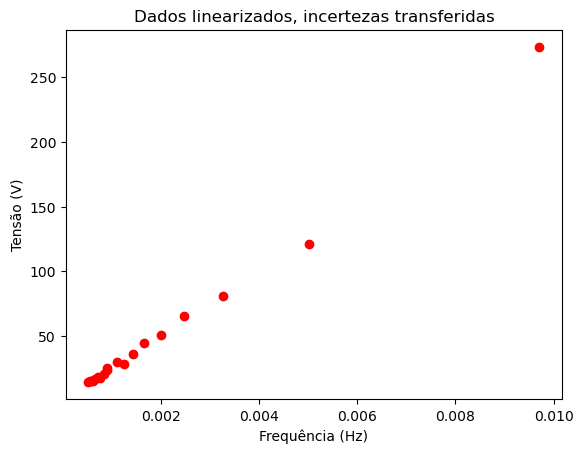

In [27]:
#plotando gráfico com as incertezas transferidas para a variável dependente (y)
plt.errorbar(z, y, incytransf,0,'or')
plt.title("Dados linearizados, incertezas transferidas")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Tensão (V)")
plt.show()


Para se obter as incertezas do ajuste é necessário obter o inverso da **matriz de covariância** do ajuste e a partir dela, os termos da sua diagonal principal. Esses termos correspondem às variâncias dos parâmetros de forma que (veja o capítulo 12 da **referência 2**):
$$\sigma_{p_j}^2=a_{jj}$$
onde os termos $a_{jj}$ correspondem a
$$ \mathcal{M}^{-1} = \begin{pmatrix} a_{00} & a_{01} \\ a_{10} & a_{11} \end{pmatrix}$$
No _WLS_ do **statsmodels** a função HC0 ('_HCzero_') retorna diretamente as incertezas do ajuste.

In [28]:
#criando os 'pesos' a partir da incerteza
ws = 1/(incytransf**2)
reglinw = sm.WLS(y,xlin,ws)
result_rlw = reglinw.fit()
fitpars = result_rlw.params
fiterrs = result_rlw.HC0_se
print(fitpars.iloc[0],fitpars.iloc[1])
print(fiterrs.iloc[0],fiterrs.iloc[1])

0.07865441355684721 25416.20125985807
1.034329786718478 896.7796220137972


**ATENÇÃO:** note que os parâmetros do ajuste **mudaram** quando as incertezas foram utilizadas como _pesos_ no ajuste.

In [29]:
#note que o statsmodels retorna os parâmetros em ordem inversa em relação aos outros dois métodos
p_0 = fitpars.iloc[1] #coef ang
p_1 = fitpars.iloc[0] #coef lin
#note que não há raiz quadrada
s_p_0 = fiterrs.iloc[1] #incert p_0
s_p_1 = fiterrs.iloc[0] #incert p_1
rp_0 = np.round(p_0,2)
rp_1 = np.round(p_1,2)
rs_p_0 = np.round(s_p_0,2)
rs_p_1 = np.round(s_p_1,2)
print("coef. angular=",rp_0,"+-",rs_p_0)
print("coef. linear=",rp_1,"+-",rs_p_1)

coef. angular= 25416.2 +- 896.78
coef. linear= 0.08 +- 1.03


## Graficando o ajuste aos pontos
Agora colocamos a linha reta referente aos pontos da seguinte forma:

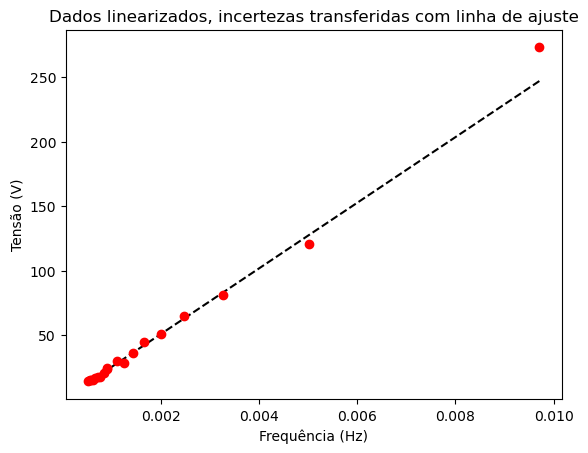

In [30]:
xline = z
yline = fitpars.iloc[0] + fitpars.iloc[1] * z
plt.errorbar(z, y, incytransf,0,'or')
plt.title("Dados linearizados, incertezas transferidas com linha de ajuste")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Tensão (V)")
#incluindo a linha do ajuste linear, k=preto, '--' = linha tracejada
plt.plot(xline, yline, 'k--')

## Qualidade do ajuste
Existem várias grandezas utilizadas como medida de qualidade do ajuste: $\chi^2_{red}$ (qui-quadrado reduzido), $R^2$ e gráfico de resíduos.



 ### 1. Teste de $\chi^2$ ou $\chi^2_{red}$
 O teste de $\chi^2$ baseia-se na expectativa de que o $\chi^2_{red}$ seja muito próximo do valor 1 (um). Para uma explicação deste teste veja o capítulo 14 da **referência 2**.
 Alguns cuidados devem ser tomados na interpretação de $\chi^2_{red}$. Em geral se os valores se afastam muito de 1 (ou $\chi^2_{red}$>>1 ou $\chi^2_{red}\approx 0$ há problemas. O primeiro dos problemas é com o a estimação da incerteza dos dados experimentais. Quando a subestimação das incertezas o valor de $\chi^2_{red}$ fica artificialmente maior que 1 e o contrário também é verdade, incertezas superestimadas levam a um reduzido valor de $\chi^2_{red}$. O último caso é sempre o sintoma de superestimação de incertezas. No entanto, quando $\chi^2_{red}$>>1 nem sempre o problema é de subestimação de incertezas, mas pode ser que a função ajustada (ou modelo) não é adequado para descrever os dados experimentais (por exemplo, usar uma reta em dados que seriam melhor descritos por um polinômio do segundo grau). Não existe uma única forma para se calcular o $\chi^2_{red}$ com o **statsmodel**, mas podemos usar o **numpy** com os resultados do _WLS_ :

In [31]:
#calulando chi^2_red
invpars = fitpars.iloc[1],fitpars.iloc[0]
yhat = np.polyval(invpars, z)
chi_squared = np.sum(((yhat - y)/incytransf) ** 2)
print(chi_squared)
chi2_red = chi_squared/(len(z)-2)
chi2_red

103442.07363579505


np.float64(6084.827860929121)

### 2. Valor de $R^2$
 O $R^2$ é simplesmente o quadrado do coeficiente de correlação. O coeficiente de correlação, geralmente denotado por $\rho$ (também conhecido como [coeficiente de correlação de Pearson](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson)). Como o valor de $\rho$ é limitado
 $$-1<\rho<1$$
 o valor de $R^2$ quadrado também será limitado ($0<R^2<1$), interpretando-se a qualidade do ajuste como sendo tão melhor quanto mais próxima de 1. No entanto, esse é um equívoco, pois assim como $\rho$, $R^2$ dá uma medida da intensidade da correlação entre os valores $x$ e $y$ dos pontos experimentais. Se o ajuste de reta proposto tiver um coeficiente angular com valor muito baixo comparado ao do coeficiente linear combinado com flutuações dos pontos moderadas (pouco mais de 1%) o valor de $R^2$ pode facilmente cair abaixo de 0.5, o que levaria à uma conclusão possivelmente errônea de má qualidade de ajuste (ou de modelo). Por outro lado, um conjunto de pontos levemente não linear (tipo $x^{3/2}$) pode ser ajustado por uma reta com $R^2$>0.9, indicando erroneamente que o ajuste é bom.
**Portanto deve-se evitar $R^2$ como única medida de qualidade de ajuste.**

O **statsmodels** tem uma forma bem simples de se obter o $R^2$ a partir dos resultados do ajuste via _WLS_ :


In [32]:
np.round(result_rlw.rsquared,3)

np.float64(0.992)

### 3. Gráfico de resíduos

O gráfico de resíduos é sempre uma boa ferramenta e deve sempre que possível ser usada complementarmente a outras medidas de qualidade, principalmente quando se usa $R^2$, que jamais deve ser usado sozinho. 
Para se fazer um gráfico de ajuste faz-se um gráfico com o mesmo eixo $x$ dos dados originais, enquanto que no eixo vertical devem ser colocados os valores da diferença $(\hat{y}-y)$, onde $\hat{y}$ são os valores calculados para cada $x$ a partir dos parâmetros do ajuste.

Um bom ajuste deverá mostrar um gráfico de resíduos com os pontos distribuídos de maneira aleatória acima e abaixo do eixo $x$. Na célula abaixo é apresentada a confecção de um gráfico de resíduos. Os dados usados neste exemplo _parecem_ razoáveis.

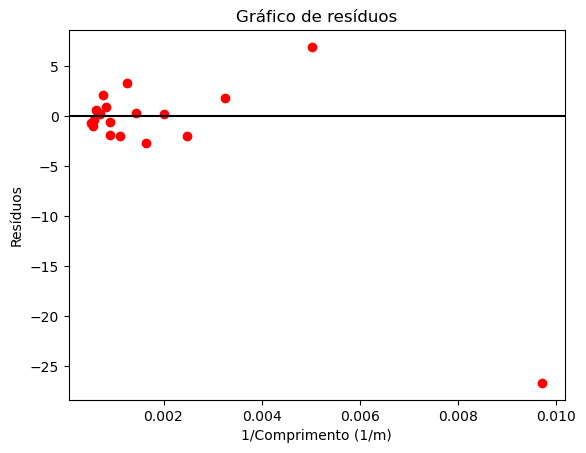

In [33]:
resid = (yhat - y)
plt.plot(z, resid, 'or')
plt.title("Gráfico de resíduos")
plt.xlabel("1/Comprimento (1/m)")
plt.ylabel("Resíduos")
plt.axhline(y=0, color='k', linestyle='-')

## Valor de Frequencia de ressonância
A frequência de ressonância é dada quando a reatância indutiva é igual a reatância capacitiva, ou seja, quando $X_L = X_C$. Portanto, temos que:
$$ \omega_0 = \frac{1}{\sqrt{LC}}$$
onde $L$ é a indutância e $C$ é a capacitância. Portanto, a frequência de ressonância é dada por:
$$ f_0 = \frac{1}{2\pi\sqrt{LC}}$$
onde $f_0$ é a frequência de ressonância, $L$ é a indutância e $C$ é a capacitância.


In [34]:
a = p_0
s_a = s_p_0

V = 3.0
s_V = 0.1

A = np.pi * ((1.15 * 10**(-3))/2)**2
s_A = abs((A * 2 * (0.001* 10**(-3)))/((1.15 * 10**(-3))/2))


print("a=",a,"+-",s_a)
print("V=",V,"+-",s_V)
print("A=",A,"+-",s_A)

#calculo da resistividade
rho.append( (V * A) / a)
s_rho.append( np.sqrt(((((V/a))*s_A)**2) + (((-(V/(a**2))*A)*s_a)**2) + (((A/a)*s_V)**2) ))

print("rho=",rho,"+-",s_rho)

a= 25416.20125985807 +- 896.7796220137972
V= 3.0 +- 0.1
A= 1.0386890710931253e-06 +- 3.6128315516282615e-09
rho= [np.float64(1.2260161073719704e-10)] +- [np.float64(5.9662464364317454e-12)]


#Frequncia de ressonância

A frequência de ressonância é dada quando a reatância indutiva é igual a reatância capacitiva, ou seja, quando $X_L = X_C$. Portanto, temos que:

$$ X_L = \frac{V_L}{I} = \frac{f * a_l}{I} $$
$$ X_C = \frac{V_C}{I} = \frac{a_c}{fI} $$

$$ \frac{f* a_l}{I} = \frac{a_c}{fI}  \rightarrow f^2 = \frac{a_c}{a_l} \rightarrow f = \sqrt{\frac{a_c}{a_l}}$$

In [35]:
aC = p_0
s_aC = s_p_0

f = np.sqrt(aC/aL)
s_f = np.sqrt(((1 / aC) / (2 * np.sqrt(aL / aC)) * s_aL)**2 + ((-aL / (2 * np.sqrt(aL / aC))) / (aC ** 2) * s_aC)**2)
print("f=",f,"+-",s_f)

f= 1571.3377112987691 +- 1.3964388352993791e-05


## Referências

1. Principios de Física - Volume 2,  Raymond A. Serway, John W. Jewett, Jr., Tradução da 5$^a$ Edição Norte-Americana, 2015 (ISBN-10:85-221-1637-7)
2. Fundamentos da Teoria dos Erros, José Henrique Vuolo, 2$^a$ edição, Editora Edgar Blücher, 1996 (ISBN: 85-212-0056-0)